In [7]:
%matplotlib inline

In [8]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

$e^{i\pi/6}\sin(\pi/6) + 3e^{i5\pi/6}\sin(5\pi/6)\cos(\theta)$

In [120]:
# Unite from msqr to bar
def f_sqr(x):
    return ((0.143*10**(-14))**2/4)*(1+3*np.cos(x))**2*(1.e31)
    # return ((0.143*10**-14)**2/4)*(5*np.cos(x)**2-6*np.sin(x)*np.cos(x)+1)

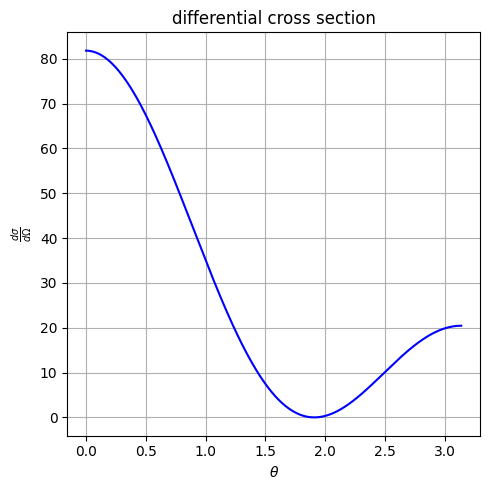

In [121]:
x = np.arange(0, np.pi, 0.01)
y = f_sqr(x)

# start the plot!
fig = plt.figure(figsize=(5,5))
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  
    
ax_a.plot(x, y, color='blue',label=None)    
ax_a.set_title(r'differential cross section')
ax_a.set_xlabel(r'$\theta$')
ax_a.set_ylabel(r'$\frac{d\sigma}{d\Omega}$')
ax_a.grid()

fig.tight_layout()
# fig.savefig('simple_pendulum_Lagrange.png', bbox_inches='tight')  

In [96]:
def theta_b(b, R=1.):
    mask = (b >= R)
    result = np.zeros_like(b)
    result[mask] = 0.
    result[~mask] = 2*(np.arcsin(b[~mask]/R)-np.arcsin(0.5*b[~mask]/R))
    return result

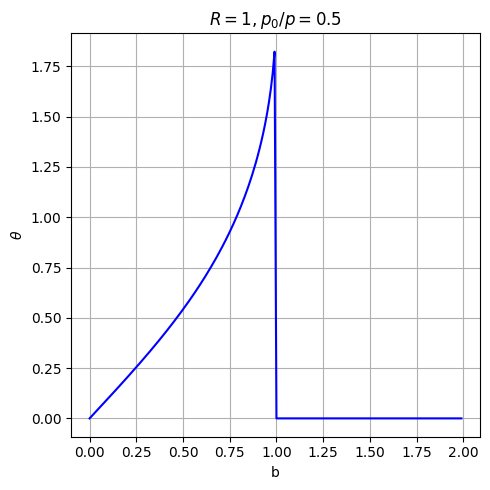

In [97]:
b = np.arange(0, 2, 0.01)
theta= theta_b(b)

# start the plot!
fig = plt.figure(figsize=(5,5))
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  
    
ax_a.plot(b, theta, color='blue',label=None)    
ax_a.set_title(r'$R=1,p_0/p=0.5$')
ax_a.set_xlabel("b")
ax_a.set_ylabel(r'$\theta$')
ax_a.grid()

fig.tight_layout() 

In [113]:
def theta_b(b, R=1.):
    mask = (b >= R)
    result = np.zeros_like(b)
    result[mask] = 0.
    result[~mask] = 2*(np.arcsin(b[~mask]/R)-np.arcsin(0.5*b[~mask]/R))
    return result

def dsigma_dOmega(b, R=1.):
    theta = theta_b(b)
    dtheta_db = 2/(R*np.sqrt(1-b**2/R**2))-1/(R*np.sqrt(1-b**2/(4*R**2)))
    return theta, b/(np.sin(theta)*dtheta_db)



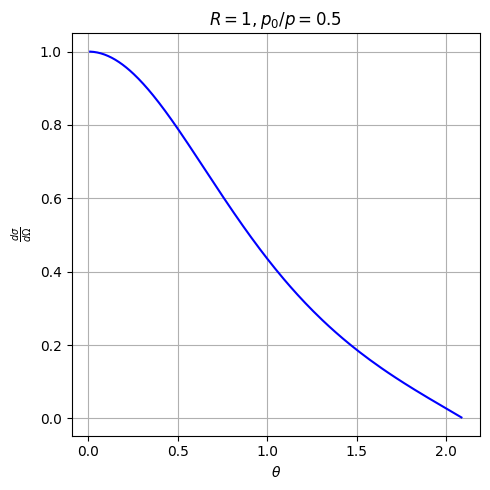

In [125]:
b = np.linspace(0.01, 0.99999, 200)
theta, dsigma_dOmega_vals = dsigma_dOmega(b)
# print(theta,dsigma_dOmega_vals)

# start the plot!
fig = plt.figure(figsize=(5,5))
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)     
ax_a.plot(theta, dsigma_dOmega_vals, color='blue',label=None)    
ax_a.set_title(r'$R=1,p_0/p=0.5$')
ax_a.set_xlabel(r'$\theta$')
ax_a.set_ylabel(r'$\frac{d\sigma}{d\Omega}$')
ax_a.grid()

fig.tight_layout()

In [167]:
def dsigma_dOmega_2(theta, gamma=1, E=1.):
    return (gamma/E)*((np.pi**2*(np.pi-theta))/(theta**2*(2*np.pi-theta)**2*np.sin(theta)))

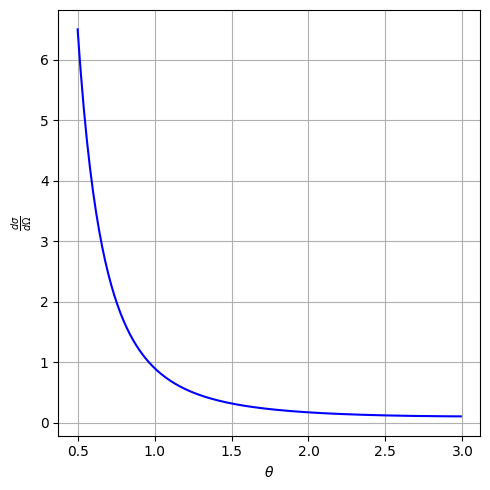

In [170]:
theta = np.arange(0.5, 3, 0.01)
dsigma_dOmega_vals_2 = dsigma_dOmega_2(theta)
# print(theta,dsigma_dOmega_vals)

# start the plot!
fig = plt.figure(figsize=(5,5))
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)     
ax_a.plot(theta, dsigma_dOmega_vals_2, color='blue',label=None)
ax_a.set_xlabel(r'$\theta$')
ax_a.set_ylabel(r'$\frac{d\sigma}{d\Omega}$')
ax_a.grid()

fig.tight_layout()